In [1]:
from BertFineTuning.data_utils import *
from BertFineTuning.model import *
from pytorch_transformers.optimization import AdamW

In [2]:
BFT=BertFineTuning()

In [3]:
BFT.criterion=nn.CrossEntropyLoss()
BFT.optimizer = AdamW(BFT.parameters_main)
BFT.scheduler=torch.optim.lr_scheduler.MultiStepLR(BFT.optimizer, milestones=[])

In [4]:
ml=MultiLoader()

In [ ]:
BFT.train(model_config,ml.bert_train_split,ml.bert_valid_split,epochs=100,print_every=100,validate_at_epoch=0)

In [5]:
BFT.load_checkpoint(BFT.save_folder+'\checkpoint7.pth')

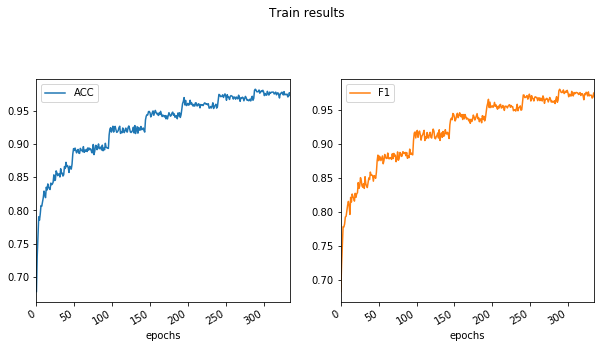

In [6]:
df=pd.DataFrame.from_dict([[item.ACC[1],item.F1[1]] for i,item in enumerate(BFT.cm_train)])
df.columns=['ACC','F1']
df.index.name='epochs'
df.plot(subplots=True,figsize=(10,10),layout=(2,2),title='Train results',grid=Tru);

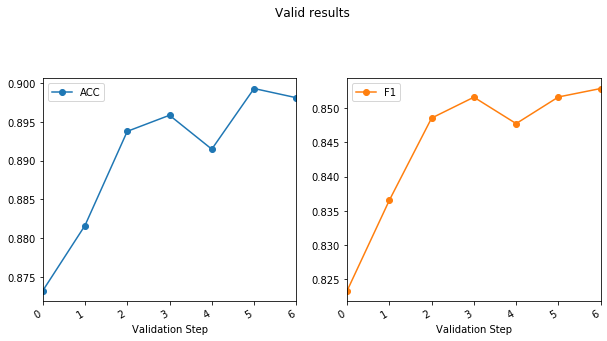

In [132]:
df=pd.DataFrame.from_dict([[item.ACC[1],item.F1[1]] for i,item in enumerate(BFT.cm_test)])
df.columns=['ACC','F1']
df.index.name='Validation Step'
ax=df.plot(subplots=True,figsize=(10,10),layout=(2,2),marker='o',title='Valid results');

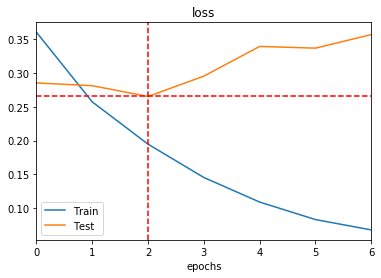

In [130]:
df_loss=pd.DataFrame([[np.mean(item) for item in chunks(BFT.loss_history,4900)],BFT.test_loss_history]).T
df_loss.index.name='epochs'
df_loss.columns=['Train','Test']
ax=df_loss.plot(title='loss')
ax.axvline(2, color="red", linestyle="--")
ax.axhline(np.min(BFT.test_loss_history), color="red", linestyle="--")